In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
!pip install xlrd

In [2]:
data1 = pd.read_excel(r'C:\Users\chaga\Downloads\data science\EastWestAirlines.xlsx',sheet_name='data')
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data = data1.rename(columns = {'ID#':'ID','Award?': 'Award'})
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
dataset = data.drop(columns = 'ID')
dataset

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:
std_scaler = StandardScaler().fit_transform(dataset)
std_scaler.shape


(3999, 11)

In [7]:
minmax_scaler = MinMaxScaler().fit_transform(dataset)
minmax_scaler.shape

(3999, 11)

In [8]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [9]:
dataset_norm = norm_func(dataset)
dataset_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [10]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(dataset)
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
dataset['cluster_new'] = hc.labels_
dataset

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [12]:
dataset.groupby('cluster_new').agg(['mean']).reset_index()

,cluster_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,39176.370140,103.776050,1.818040,1.015552,1.002488,12010.327527,10.105132,326.557698,0.969207,3875.199689,0.330638
1,1,158510.772436,276.342949,3.035256,1.008013,1.060897,35739.006410,17.153846,851.137821,2.493590,4945.536859,0.483974
2,2,841016.769231,512.692308,3.346154,1.000000,1.115385,52888.269231,22.346154,1797.807692,6.653846,6447.269231,0.846154
3,3,355242.694030,424.671642,3.059701,1.022388,1.000000,46811.955224,19.574627,1582.291045,4.835821,5654.537313,0.701493


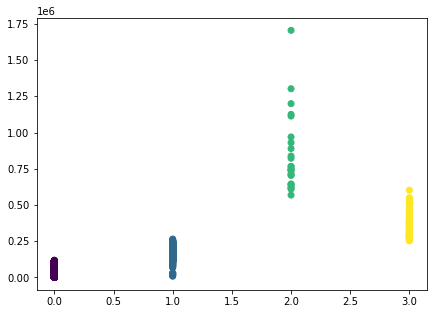

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(dataset['cluster_new'],dataset['Balance'],c= hc.labels_)

In [14]:
wcss = []
for i in range(1,15):
    kmeans = KMeans( n_clusters=i, random_state=13)
    kmeans.fit_predict(dataset)
    wcss.append(kmeans.inertia_)

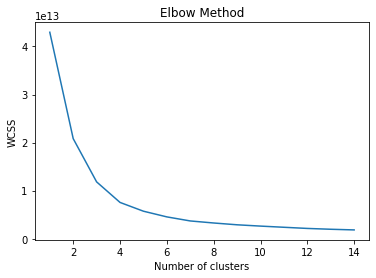

In [15]:
plt.plot(range(1,15),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score as sil

In [17]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(dataset.iloc[:,0:11])
    iner.append(sil(dataset.iloc[:,0:11],y))

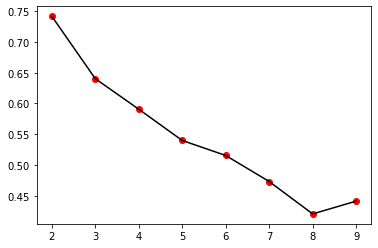

In [18]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [19]:
from sklearn.metrics import calinski_harabasz_score as chs

In [20]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(dataset.iloc[:,:11])
    iner.append(chs(dataset.iloc[:,:11],y))

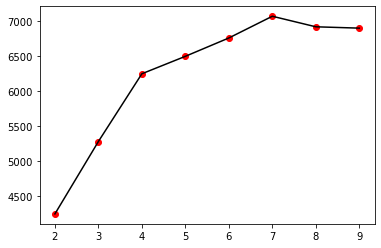

In [21]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [22]:
kmeans = KMeans(4, random_state=42)
kmeans.fit(dataset)

KMeans(n_clusters=4, random_state=42)

In [23]:
dataset['kmeans_new'] = kmeans.labels_

In [24]:
dataset

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_new,kmeans_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [25]:
dataset.groupby('kmeans_new').agg(['mean']).reset_index()

,kmeans_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_new
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,30832.309643,101.988571,1.665714,1.016429,1.005000,10077.510000,9.314643,290.848571,0.884643,3785.443929,0.323929,0.002857
1,1,127878.637652,217.636640,2.938259,1.009109,1.032389,31142.027328,16.483806,748.964575,2.142713,4736.143725,0.441296,0.571862
2,2,842320.230769,512.692308,3.346154,1.000000,1.115385,57797.192308,22.730769,1845.884615,6.961538,6463.000000,0.846154,2.038462
3,3,323009.848649,337.248649,3.145946,1.016216,1.000000,43644.118919,18.583784,1283.335135,3.881081,5532.583784,0.627027,2.443243


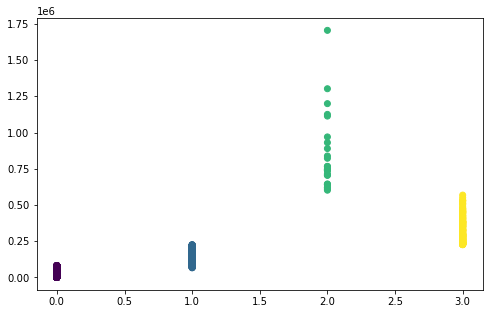

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(dataset['kmeans_new'],dataset['Balance'],c= kmeans.labels_)

In [27]:
kmeans.cluster_centers_

array([[3.08146252e+04, 1.02025009e+02, 1.66523758e+00, 1.01643444e+00,
        1.00500179e+00, 1.00755766e+04, 9.31153984e+00, 2.90952483e+02,
        8.84958914e-01, 3.78406895e+03, 3.23687031e-01, 2.85816363e-03],
       [1.27830561e+05, 2.17416582e+02, 2.93832154e+00, 1.00910010e+00,
        1.03235592e+00, 3.11262002e+04, 1.64853387e+01, 7.48207280e+02,
        2.14054601e+00, 4.73907381e+03, 4.41860465e-01, 5.71284125e-01],
       [8.42320231e+05, 5.12692308e+02, 3.34615385e+00, 1.00000000e+00,
        1.11538462e+00, 5.77971923e+04, 2.27307692e+01, 1.84588462e+03,
        6.96153846e+00, 6.46300000e+03, 8.46153846e-01, 2.03846154e+00],
       [3.23009849e+05, 3.37248649e+02, 3.14594595e+00, 1.01621622e+00,
        1.00000000e+00, 4.36441189e+04, 1.85837838e+01, 1.28333514e+03,
        3.88108108e+00, 5.53258378e+03, 6.27027027e-01, 2.44324324e+00]])

In [28]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(dataset)

DBSCAN(eps=0.8, min_samples=6)

In [29]:
dataset['dbscan_new'] = dbscan.labels_

In [30]:
dataset

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_new,kmeans_new,dbscan_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,-1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,-1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,-1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,-1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,-1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0,-1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,-1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,-1
